<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/Small_Business_Owners_in_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE:Small Business Owners Segmentation in the United States

## 1.0. TITLE PAGE




### Project Title:Small Business Owners Segmentation in the United States

## 2.0. Table of Contents





1.   Introduction
2.   Data Description

3.   Exploratory Data Analysis (EDA)
4.   Data Splitting and model Selection

5.   Model Building and Evaluation
6.   Project Communication

7.   Recommendations
8.   Appendix








## 3.0.Introduction

---
3.1 Brief Background

<p align = 'justify'>Objective:

   Understand the diversity within the small business owner population in the United States and highlight why segmentation is important for tailoring products, services, and policies.

Contextual Overview:

  This project is based on data from the Survey of Consumer Finances (SCF)—a nationally representative, triennial cross-sectional survey of U.S. families. The SCF is conducted by the Federal Reserve Board, and it provides in-depth data on families’ balance sheets, pensions, income, assets, liabilities, and demographic characteristics.</p>

<p align = 'justify'>3.2 Project Description and Methods

  The project follows a structured data science pipeline to analyze and segment small business owners:

*   Exploratory Data Analysis (EDA): We begin by examining key demographic and financial features such as age, income category, and debt vs home value. This provides a foundational understanding of the dataset and the diversity within the population.
*   Feature Selection: We identify and retain high-variance features—those that differ the most between individuals—to ensure that the clustering model can meaningfully separate groups.

*   Clustering Model: Using unsupervised machine learning (e.g., K-Means or Hierarchical Clustering), we divide business owners into distinct customer segments based on similarities in their characteristics.
*   Validation and Optimization: We evaluate different numbers of clusters using methods like the Elbow Method and Silhouette Score to identify the optimal number of segments.</p>
3.3 Why Customer Segmentation? (Value of the Project)



  Key Benefits:

* 🔍 Deeper Customer Insights:
Gain a comprehensive understanding of small business owners by identifying patterns in age, income, debt, and assets—revealing distinct subgroups that are not visible through general analysis.
*   🎯 Personalized Services & Targeted Outreach:
Enable banks, fintechs, and marketers to tailor products, credit options, and campaigns to the unique needs and behaviors of each customer segment.

*   🛠️ Smarter Policy & Program Design
Help policymakers and development agencies allocate resources, training, or funding more effectively by identifying financially vulnerable or underserved business owner groups.
*   📊 Data-Driven Decision Making
Leverage SCF’s nationally representative data to ensure segmentation strategies are grounded in real, high-quality financial behavior—supporting more accurate forecasting and risk assessment.
3.5 Strategic Recommendations:
Translate insights from clustering into real-world strategies that stakeholders can implement.


























## 4.0 Data Description

---


### 4.1 Data Sources
The primary dataset used in this project is the Survey of Consumer Finances (SCF), conducted by the Federal Reserve Board. The SCF is a triennial cross-sectional survey that provides detailed data on the financial and demographic characteristics of U.S. households.
### 4.2 Data Dictionary
A summary of the data used for the project is provided in the table appendix below the project.

## 5.0 Data Preparation

---


### 5.1 Import Project Dependables

In [ ]:
import pandas as pd
import plotly.express as px
# import wqet_graderi
from IPython.display import VimeoVideo
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import seaborn as sns
import matplotlib.pyplot as plt

### 5.2 Data Loading,Inspection and Cleaning

In [ ]:
df=pd.read_excel('/content/customer_segment.xlsx')
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (28885, 352)


,Unnamed: 0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,0,1,11,6119.779308,2,75,6,12,4,2,...,5,3,6,3,2,10,6,6,3,3
1,1,1,12,4712.374912,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2
2,2,1,13,5145.224455,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2
3,3,1,14,5297.663412,2,75,6,12,4,2,...,5,2,6,2,1,10,4,4,2,2
4,4,1,15,4761.812371,2,75,6,12,4,2,...,5,3,6,3,1,10,5,5,2,2


In [ ]:
# drop unamed column
df_small_biz = df_small_biz.drop(columns=['Unnamed: 0'])
df_small_biz.head()

In [ ]:
# check for missing values
df.isna().sum()

,0
Unnamed: 0,0
YY1,0
Y1,0
WGT,0
HHSEX,0
...,...
NWPCTLECAT,0
INCPCTLECAT,0
NINCPCTLECAT,0
INCQRTCAT,0


In [ ]:
prop_biz_owners =(df[df["HBUS"] == 1].shape[0])/ df.shape[0]*100
print(f'proportion of business owners in df: {round(prop_biz_owners,2)}%')

proportion of business owners in df: 27.4%


There are 28885 observations and 352 features in the dataset.The decription for each of the features is provided in the appendix section.

   There are no missing values in the dataset.




## 6.0 Exploratory Data Analysis (EDA)

---



Research question 1: We're focusing on business owners. But what percentage of the respondents in df are business owners?</p>

<p align = 'justify'>We will Calculate the proportion of respondents in the dataframe that are business owners, and assign the result to the variable prop_biz_owners. We'll need to review the documentation regarding the "HBUS" column to complete these tasks.

Create a DataFrame df_inccat that shows the normalized frequency for income categories for business owners and non-business owners.

In [ ]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat =(df['INCCAT']#selecting the inccat column
            .replace(inccat_dict)#we replace incat column with the incat dict
            .groupby(df['HBUS'])#group by either business or non business owners
            .value_counts(normalize=True)#take a count of each category
            .rename('frequency')#rename the column as frequency
            .to_frame()#convert to dataframe
            .reset_index()

           )

df_inccat

,HBUS,INCCAT,frequency
0,0,0-20,0.210348
1,0,21-39.9,0.198140
2,0,40-59.9,0.189080
3,0,60-79.9,0.186600
4,0,90-100,0.117167
5,0,80-89.9,0.098665
6,1,90-100,0.629438
7,1,60-79.9,0.119015
8,1,80-89.9,0.097410
9,1,40-59.9,0.071510


Using seaborn,we create a side-by-side bar chart of df_inccat. Set hue to "HBUS", and make sure that the income categories are in the correct order along the x-axis. Label to the x-axis "Income Category", the y-axis "Frequency (%)", and use the title "Income Distribution: Business Owners vs. Non-Business Owners"

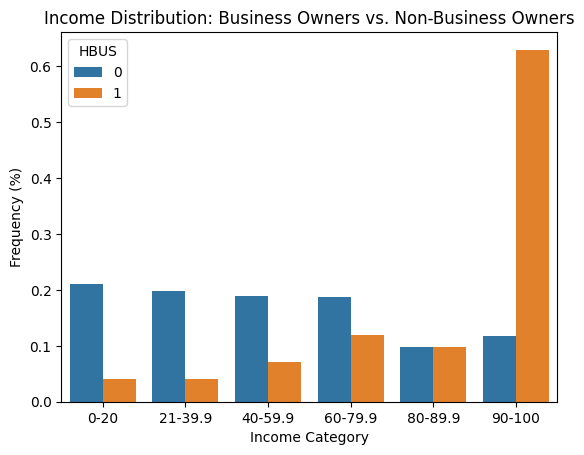

In [ ]:
# Create bar chart of `df_inccat`
sns.barplot(x='INCCAT',y='frequency',hue='HBUS',data=df_inccat,order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Business Owners vs. Non-Business Owners");

From the chart above, respondents within the income category 6 (the highest income class) are business owners.generally, top income earners from each category are business owners.

 Research Question 2: Are there notable differences between business owners and non-business owners in the context of  home value and household dept?

Using seaborn, we create a scatter plot that shows "HOUSES" vs. "DEBT". We will color the datapoints according to business ownership and  label the x-axis "Household Debt", the y-axis "Home Value", and use the title "Home Value vs. Household Debt".

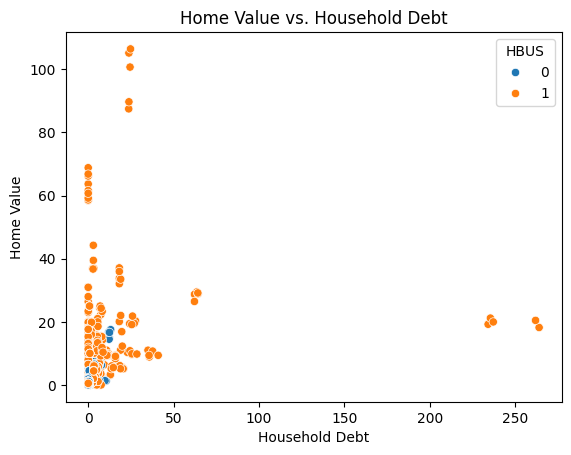

In [ ]:
# Plot "HOUSES" vs "DEBT" with hue as business ownership
sns.scatterplot(x=df['DEBT']/1e6,y=df['HOUSES']/1e6, hue=df['HBUS'])#divide by 1*10^6
plt.xlabel("Household Debt")
plt.ylabel("Home Value")
plt.title("Home Value vs. Household Debt");

<p align = 'justify'>The scatter plot shows that the majority of business owners cluster in the region of low household debt and low home value. This observation can be interpreted as follows:

*  <p align = 'justify'> These business owners may be risk-averse, preferring to maintain low debt levels and avoid heavy borrowing.
* <p align = 'justify'>  This could reflect a desire for financial stability, especially important for entrepreneurs who already face business-related financial risks.

*   <p align = 'justify'> low home value suggests that many of these business owners may not yet have built substantial personal wealth or assets.t item
*  <p align = 'justify'> This could indicate that they are either early in their entrepreneurial journey or operate small-scale, possibly family-run businesses with limited capital.







For the model building part of this project, we're going to focus on small business owners, defined as respondents who have a business and whose income does not exceed $500,000.This is because majority of our respondents fall between this range.

In [ ]:
mask = (df['HBUS'] == 1) & (df['INCOME'] < 500_000)
df_small_biz = df[mask]
print("df_small_biz shape:", df_small_biz.shape)
df_small_biz.head()

df_small_biz shape: (4364, 352)


,Unnamed: 0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
80,80,17,171,7802.265717,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
81,81,17,172,8247.536301,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
82,82,17,173,8169.562719,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
83,83,17,174,8087.704517,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4
84,84,17,175,8276.510048,1,62,4,12,4,1,...,3,5,5,5,2,7,9,9,4,4


Creating a histogram from the "AGE" column in df_small_biz with 10 bins. We will label the x-axis "Age", the y-axis "Frequency (count)", and use the title "Small Business Owners: Age Distribution".

(Text(0.5, 1.0, 'Small Business Owners: Age Distribution'),)

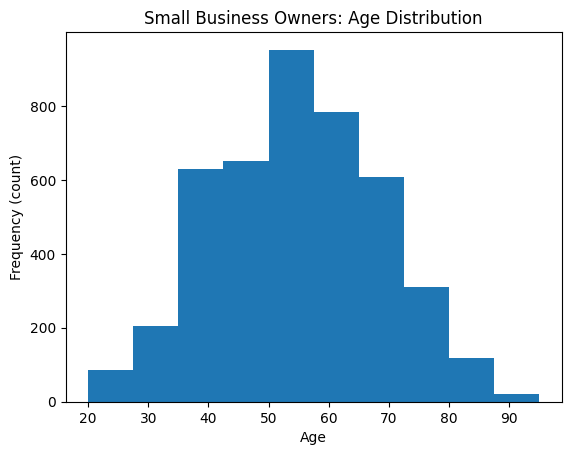

In [ ]:
# Create the histogram with 10 bins because we expect most of our responddents
#to range from 20-90 yrs with each bin at 10 yrs.
plt.hist(df_small_biz['AGE'], bins=10)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Small Business Owners: Age Distribution"),


Majority of the small business owners are between 50-65 years.

Finding the variance for all the features in df_small_biz, and creating a Series top_ten_var with the 10 features with the largest variance.

### 6.1 Feature Selection

In [ ]:
# Calculate variance, get 10 largest features
top_ten_var =df_small_biz.var().sort_values().tail(10)
top_ten_var

,0
EQUITY,1.005088e+13
FIN,2.103228e+13
KGBUS,5.025210e+13
ACTBUS,5.405021e+13
BUS,5.606717e+13
KGTOTAL,6.120760e+13
NHNFIN,7.363197e+13
NFIN,9.244074e+13
NETWORTH,1.424450e+14
ASSET,1.520071e+14


Calculating the trimmed variance for the features in df_small_biz.Our calculations should not include the top and bottom 10% of observations. Then we create a Series top_ten_trim_var with the 10 features with the largest variance.

In [ ]:
# Calculate trimmed variance
#we eliminated the button and top 10% because of outliers.outliers can inflate
#variance.
top_ten_trim_var = df_small_biz.apply(trimmed_var,limits=(0.1,0.1)).sort_values().tail(10)
top_ten_trim_var

,0
EQUITY,1.177020e+11
KGBUS,1.838163e+11
FIN,3.588855e+11
KGTOTAL,5.367878e+11
ACTBUS,5.441806e+11
BUS,6.531708e+11
NHNFIN,1.109187e+12
NFIN,1.792707e+12
NETWORTH,3.726356e+12
ASSET,3.990101e+12


<p align = 'justify'>We will Use plotly express to create a horizontal bar chart of top_ten_trim_var. We label the  x-axis "Trimmed Variance [$]", the y-axis "Feature", and use the title "Small Business Owners: High Variance Features".

In [ ]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
x=top_ten_trim_var,
y=top_ten_trim_var.index,
title="Small Business Owners: High Variance Features"
)
fig.update_layout(xaxis_title="Trimmed Variance [$]",yaxis_title="Feature")



fig.show()

From the plot above, we generate a list high_var_cols with the columng names of the five features with the highest trimmed variance.

In [ ]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
high_var_cols

['BUS', 'NHNFIN', 'NFIN', 'NETWORTH', 'ASSET']

### 6.1.2 Split the dataset

The EDA reviewed clusters in our dataset hence we have adopted K-Means clustering for this project.

In [ ]:
X = df_small_biz[high_var_cols]#selecting the high var columns from the dataframe
print("X shape:", X.shape)
X.head()

X shape: (4364, 5)


,BUS,NHNFIN,NFIN,NETWORTH,ASSET
80,0.0,224000.0,724000.0,237600.0,810600.0
81,0.0,223000.0,723000.0,236600.0,809600.0
82,0.0,224000.0,724000.0,237600.0,810600.0
83,0.0,222000.0,722000.0,234600.0,808600.0
84,0.0,223000.0,723000.0,237600.0,809600.0


## 7.0 Build Model

---



### 7.1 Hyperparameter tunning

<p align = 'justify'>Using a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). our model should include a StandardScaler. Each time a model is trained, we calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.

In [ ]:
n_clusters = range(2,13)
inertia_errors =[]
silhouette_scores =[]

# Add `for` loop to train model and calculate inertia, silhouette score.

for k in n_clusters:
    # build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    # fit the model
    model.fit(X)
    # calculate inertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # calculate silhouette_scores
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))


print("Inertia:", inertia_errors[:11])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [5772.342660776862, 5103.378729358504, 2612.472144164606, 1778.5168132391761, 1559.9959267012691, 1306.784734800279, 1148.7349293704049, 891.2046493666484, 784.3762868904288, 727.4507819976587, 635.2271315309641]

Silhouette Scores: [0.9577268088436816, 0.9454032430976221, 0.8422554154068181]


Using plotly express to create a line plot that shows the values of inertia_errors as a function of n_clusters. we will Be sure to label our x-axis "Number of Clusters", y-axis "Inertia", and use the title "K-Means Model: Inertia vs Number of Clusters".

In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig =px.line(
x=n_clusters,y=inertia_errors,title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Inertia")



fig.show()

Using plotly express to create a line plot that shows the values of silhouette_scores as a function of n_clusters. We will Be sure to label the x-axis "Number of Clusters", y-axis "Silhouette Score", and use the title "K-Means Model: Silhouette Score vs Number of Clusters".

In [ ]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig =px.line(
x=n_clusters,y=silhouette_scores,title="K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Silhouette Score")

fig.show()

From the two plots above, we have a low inertia with number of clusters as 4 and from the second plot we have the highest silhouette score at 3 clusters hence we build and train a new k-means model named final_model. The number of clusters should be 3.

### 7.2 Build Model Pipeline

In [ ]:
final_model = make_pipeline(
StandardScaler(),
KMeans(n_clusters=3,random_state=42)
)

# Fit model to data
final_model.fit(X)

# Assert that model has been fit to data
check_is_fitted(final_model)


## 8.0 Communication

A DataFrame xgb that contains the mean values of the features in X for the 3 clusters in the final_model.

In [ ]:
labels = final_model.named_steps['kmeans'].labels_
xgb = X.groupby(labels).mean()
xgb

,BUS,NHNFIN,NFIN,NETWORTH,ASSET
0,1.190098e+06,1.600330e+06,2.181143e+06,2.959737e+06,3.205596e+06
1,5.328110e+07,6.684923e+07,7.131403e+07,9.709848e+07,9.808381e+07
2,9.114993e+07,9.858337e+07,1.156634e+08,1.194910e+08,1.265637e+08


Using plotly express to create a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters in the final_model. We will be sure to label the x-axis "Cluster", the y-axis "Value [$]", and use the title "Small Business Owner Finances by Cluster".

In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
xgb,
barmode='group',
title="Small Business Owner Finances by Cluster")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")

fig.show()

### 8.1 Interpretation of the Clusters

🔵 Cluster 2 – High-Value Owners (Wealth-Established Segment)

   Characteristics:

*   High total assets and net worth.
*   Significant ownership of non-financial assets (e.g., property, vehicles, equipment).

*   Strong presence in business ownership value (BUS).

Interpretation:

*   This group represents financially successful or mature business owners.
*   Likely to be well-established, possibly multi-business owners or operating at a large scale.

*   May already have access to a range of financial services and might seek investment advisory, wealth management, or advanced business expansion solutions.

🟡 Cluster 1 – Moderate-Value Owners (Growth-Oriented Segment)

Characteristics:

*   Moderate levels across all financial indicators.
*   Some presence in business ownership value and assets.

Interpretation:

*   These business owners are likely in the growth or scaling phase.
*   They may own one or more businesses but still be building their financial base.

*   This segment can benefit from growth capital, business mentorship, or targeted lending products to help them move into the high-value segment.

🔴 Cluster 0 – Low/No-Value Owners (Emerging or Vulnerable Segment)

Characteristics:

*   Zero to very low asset values, net worth, and business valuation.
*   May not yet own significant property or financial assets.

Interpretation:

*   These are likely early-stage entrepreneurs, side-hustle operators, or financially vulnerable business owners.
*  They may struggle with capital access or operate in highly volatile sectors.

*   This group could benefit from microfinancing, financial literacy programs, and credit-building support.





















































### 🎯8.2 How This Information Is Useful
1.Customer Targeting & Personalization


* Financial institutions and lenders can differentiate offerings based on risk level and potential.
*  Tailored products (e.g., microloans for Cluster 0, investment services for Cluster 2).

2.Policy & Program Design

*   Governments or NGOs can use this to target support and training to those most in need (Cluster 0).
*   
Tax incentives, grants, and startup funding could be better focused.

3.Business Strategy Development

Consultants and advisors can build custom strategies for each group:

1. Cluster 0: Sustainability and credit building.

2. Cluster 1: Scaling and digital transformation.

3. Cluster 2: Diversification and legacy planning.

4.Market Segmentation & Communication

Businesses serving SMEs can use this segmentation to refine messaging, pricing, and delivery models depending on the segment.



Create a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca. The columns of X_pca should be named "PC1" and "PC2".

In [ ]:
# Instantiate transformer
pca =PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca =pd.DataFrame(X_t,columns=['PC1','PC2'])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4364, 2)


,PC1,PC2
0,-6.220648e+06,503841.638839
1,-6.222523e+06,503941.888901
2,-6.220648e+06,503841.638839
3,-6.224927e+06,504491.429465
4,-6.221994e+06,503492.598399


Use plotly express to create a scatter plot of X_pca using seaborn. Be sure to color the data points using the labels generated by your final_model. Label the x-axis "PC1", the y-axis "PC2", and use the title "PCA Representation of Clusters".

In [ ]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
data_frame=X_pca,
x='PC1',
y='PC2',
color=labels.astype(str),#to have the labels as categories rather than continous variables
title="PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1",yaxis_title='PC2')


fig.show()

### 8.3 PCA Interpretation Summary (with Clusters)

Principal Component Analysis (PCA)  was applied to reduce the  five high-variance financial features to two principal components. The clusters, when visualized in this PCA space, show the following:

🔵 Cluster 0 – Low Principal Component Scores, Largest Concentration

1.  Represents the majority of business owners in the dataset.

2. Characterized by very low asset, net worth, and business ownership values.

3. Concentration in the lower-left of the PCA plot suggests a homogeneous group with limited financial activity.

🟢 Cluster 1 (Green): Mid-Level Segment – Moderate Concentration

1. Occupies the central region of the PCA plot.

2. Business owners here exhibit moderate scores on both principal components.

3. This is a transitional segment with a moderate presence, representing entrepreneurs who are growing but not yet established.

🔴 Cluster 2 (Red): High-Value Segment – Smallest Concentration
1. Found in the upper-right quadrant of the PCA plot, with high scores across both components.

2. Represents financially strong business owners with significant asset ownership and high business equity.

3. This is the smallest cluster, but the members hold disproportionate economic value.

















### 8.4 Strategic Recommendations

🔵 Cluster 0 – Low-Asset Business Owners (Blue Segment)

 🎯 Target: Inclusion & Capacity Building
Microfinance & Low-Interest Credit:
1. Introduce microloan programs and flexible credit schemes tailored to very small or informal businesses.

2. Financial Literacy & Business Training:
Partner with NGOs, banks, and local governments to provide training on budgeting, record-keeping, and basic entrepreneurship.

3. Digital & Mobile Banking Adoption:
Encourage digital tools and mobile banking to help bridge access gaps in financial services.

4. Public-Private Incentives:
Offer tax incentives or subsidies for companies and investors that support this group through mentorship or capital.

🟢 Cluster 1 – Emerging Business Owners (Green Segment)

🎯 Target: Business Growth & Stability
1. Scale-Up Grants & Growth Loans:
Design programs to offer conditional funding (e.g., matched grants or venture debt) for scaling operations or hiring.

2. Incubation & Mentorship Programs:
Create networks linking this group to successful entrepreneurs and accelerators to promote best practices and growth strategies.

3. Business Formalization Incentives:
Encourage business registration through tax breaks, easier licensing, or legal aid services to promote legitimacy and access to financing.

4. Market Access Support:
Help connect these businesses to larger supply chains, B2B platforms, and export opportunities.

🔴 Cluster 2 – High-Asset Business Owners (Red Segment)

🎯 Target: Wealth Utilization & Ecosystem Leadership
1. Investment Platforms & Wealth Management:
Offer tailored investment advisory services, including portfolio diversification and impact investing opportunities.

2. Mentorship Roles in SME Development:
Position them as mentors or angel investors to foster grassroots business development.

3. Policy Advocacy & Leadership Councils:
Involve this group in public-private partnerships or business councils to shape SME policies and advocate for business-friendly environments.

4. Succession Planning & Legacy Strategies:
Provide tools for long-term planning, succession, and business sustainability, particularly for family-run businesses.

🔄 Cross-Cluster Recommendations
1. Segment-Specific Financial Products:
Banks and fintech firms should design differentiated financial products for each segment—considering their risk profiles and growth stages.

2. Data-Driven Outreach:
Use cluster insights to drive targeted marketing, outreach, and support mechanisms—ensuring services match business owners' real financial situations.

3. Policy Makers & Planners:
Use the segmentation as a foundation for evidence-based planning, ensuring that interventions are equitable, efficient, and impactful across the entrepreneurship spectrum.






















## 9.0 Appendix 1

---


### 9.1 Data Dictionary

| Feature | Description |
| :------ | :---------- |
| [**`ACTBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ACTBUS) | Total value of actively managed business(es), 2019 dollars |
| [**`AGE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGE) | Age of reference person |
| [**`AGECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGECL) | Age group of the reference person |
| [**`ANNUIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANNUIT) | Amount R would receive if they cashed in annuities, 2019 dollars |
| [**`ANYPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANYPEN) | Pension exists for either reference person or spouse |
| [**`ASSET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSET) | Total value of assets held by household, 2019 dollars |
| [**`ASSETCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSETCAT) | Asset percentile groups |
| [**`BCALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BCALL) | Information used for borrowing decisions | call around |
| [**`BDONT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BDONT) | Information used for borrowing decisions | never borrow |
| [**`BFINPLAN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPLAN) | Information used for borrowing decisions | lawyer, accountant, financial planner |
| [**`BFINPRO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPRO) | Information used for borrowing decisions | banker, broker, real estate broker, builder, dealer, insurance agent |
| [**`BFRIENDWORK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFRIENDWORK) | Information used for borrowing decisions | friends, material from work/business contacts |
| [**`BINTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BINTERNET) | Information used for borrowing decisions | internet/online service |
| [**`BMAGZNEWS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAGZNEWS) | Information used for borrowing decisions | magazines, newspapers, books |
| [**`BMAILADTV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAILADTV) | Information used for borrowing decisions | material in mail, TV, radio, advertisements, telemarketer |
| [**`BNKRUPLAST5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#BNKRUPLAST5) | Household has declared bankruptcy in the past 5 years |
| [**`BOND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BOND) | Total value of directly held bonds held by household, 2019 dollars |
| [**`BOTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BOTHER) | Information used for borrowing decisions | other sources |
| [**`BPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BPLANCJ) | Either reference person or spouse/partner has both types of pension plan on a current job |
| [**`BSELF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSELF) | Information used for borrowing decisions | self, shop around, other personal research |
| [**`BSHOPGRDL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPGRDL) | Shopping for borrowing and credit | great deal of shopping |
| [**`BSHOPMODR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPMODR) | Shopping for borrowing and credit | moderate shopping |
| [**`BSHOPNONE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPNONE) | Shopping for borrowing and credit | almost no shopping |
| [**`BUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUS) | Total value of business(es) in which the household has either an active or nonactive interest, 2019 dollars |
| [**`BUSSEFARMINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#BUSSEFARMINC) | Income from business, sole proprietorship, and farm, 2019 dollars |
| [**`BUSVEH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUSVEH) | Household has vehicle(s) owned by business |
| [**`CALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CALL) | Total value of call accounts held by household, 2019 dollars |
| [**`CANTMANG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CANTMANG) | Why no checking account | can't manage/balance a checking account |
| [**`CASEID`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CASEID) | Case ID (numeric) |
| [**`CASHLI`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CASHLI) | Total cash value of whole life insurance held by household, 2019 dollars |
| [**`CCBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#CCBAL) | Total value of credit card balances held by household, 2019 dollars |
| [**`CDS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CDS) | Total value of certificates of deposit held by household, 2019 dollars |
| [**`CHECKING`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CHECKING) | Total value of checking accounts held by household, 2019 dollars |
| [**`CKCONNECTN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONNECTN) | Why chose main checking account institution | connection through work/school |
| [**`CKCONVPAYRL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONVPAYRL) | Why chose main checking account institution | other convenience, payroll deduction/direct deposit |
| [**`CKLOCATION`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOCATION) | Why chose main checking account institution | location of their offices |
| [**`CKLONGTIME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLONGTIME) | Why chose main checking account institution | always done business there, banked there a long time |
| [**`CKLOWFEEBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOWFEEBAL) | Why chose main checking account institution | had the lowest fees/minimum balance requirement |
| [**`CKMANYSVCS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKMANYSVCS) | Why chose main checking account institution | able to obtain many services at one place |
| [**`CKOTHCHOOSE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKOTHCHOOSE) | Why chose main checking account institution | other reason |
| [**`CKPERSONAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKPERSONAL) | Why chose main checking account institution | personal relationship |
| [**`CKRECOMFRND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKRECOMFRND) | Why chose main checking account institution | recommended, friend/family has account there |
| [**`CKSAFETY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKSAFETY) | Why chose main checking account institution | offered safety and absence of risk |
| [**`COMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#COMUTF) | amount in combination and other mutual funds, 2019 dollars |
| [**`CONSPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#CONSPAY) | total monthly consumer debt payments, 2019 dollars |
| [**`CPI_DEFL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CPI_DEFL) | Deflator Value |
| [**`CREDIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CREDIT) | Why no checking account | credit problems, bankruptcy, does not meet qualifications for an account |
| [**`CURRPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CURRPEN) | current value in pension, 2019 dollars |
| [**`DBPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANCJ) | Either reference person or spouse/partner has a defined benefit pension on a current job |
| [**`DBPLANT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANT) | Either reference person or spouse/partner has DB plan on current job or some type of pension from a past job to be received in the future |
| [**`DCPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DCPLANCJ) | Either reference person or spouse/partner has any type of account-based plan on a current job |
| [**`DEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#DEBT) | Total value of debt held by household, 2019 dollars |
| [**`DEBT2INC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#DEBT2INC) | Ratio of total debt to total income |
| [**`DEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DEQ) | Total value of equity in directly held stocks, stock mutual funds, and combination mutual funds held by household, 2019 dollars |
| [**`DONTLIKE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTLIKE) | Why no checking account | don't like dealing with banks |
| [**`DONTWANT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWANT) | Why no checking account | does not want/need a checking account |
| [**`DONTWRIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWRIT) | Why no checking account | don't write enough checks to make it worthwhile |
| [**`EDCL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDCL) | Education category of reference person |
| [**`EDN_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#EDN_INST) | Total value of education loans held by household, 2019 dollars |
| [**`EDUC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDUC) | Highest completed grade by reference person |
| [**`EHCHKG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#EHCHKG) | people w/o checking accounts | ever had an account? |
| [**`EMERGBORR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGBORR) | Respondent would borrow money in a hypothetical financial emergency |
| [**`EMERGCUT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGCUT) | Respondent would cut back spending in a hypothetical financial emergency |
| [**`EMERGPSTP`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGPSTP) | Respondent would postpone payments in a hypothetical financial emergency |
| [**`EMERGSAV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGSAV) | Respondent would spend out of savings in a hypothetical financial emergency |
| [**`EQUITINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITINC) | ratio of equity to normal income |
| [**`EQUITY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITY) | Total value of financial assets held by household that are invested in stock, 2019 dollars |
| [**`EXPENSHILO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EXPENSHILO) | Households overall expenses over last 12 months |
| [**`FAMSTRUCT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FAMSTRUCT) | Family structure of household |
| [**`FARMBUS_KG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#FARMBUS_KG) | capital gains on farm businesses, 2019 dollars |
| [**`FARMBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#FARMBUS) | compute value of business part of farm net of outstanding mortgages, 2019 dollars |
| [**`FEARDENIAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FEARDENIAL) | Household feared being denied credit in the past 5 years |
| [**`FIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FIN) | Total value of financial assets held by household, 2019 dollars |
| [**`FINLIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#FINLIT) | Number of financial literacy questions answered correctly |
| [**`FOODAWAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODAWAY) | Total amount spent on food away from home, annualized, 2019 dollars |
| [**`FOODDELV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODDELV) | Total amount spent on food delivered to home, annualized, 2019 dollars |
| [**`FOODHOME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODHOME) | Total amount spent on food at home, annualized, 2019 dollars |
| [**`FORECLLAST5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FORECLLAST5) | Respondent had a foreclosure in the last five years |
| [**`FUTPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FUTPEN) | future pensions (accumulated in an account for the R/S), 2019 dollars |
| [**`GBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GBMUTF) | amount in government bond mutual funds, 2019 dollars |
| [**`GOVTBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GOVTBND) | US government and government agency bonds and bills, 2019 dollars |
| [**`HBORRALT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRALT) | Respondent would borrow money from alternative sources in a hypothetical financial emergency |
| [**`HBORRCC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRCC) | Respondent would borrow money using a credit card in a hypothetical financial emergency |
| [**`HBORRFF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFF) | Respondent would borrow money from friends or family in a hypothetical financial emergency |
| [**`HBORRFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFIN) | Respondent would borrow money from financial services in a hypothetical financial emergency |
| [**`HBROK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBROK) | have a brokerage account |
| [**`HBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBUS) | Have active or non-actively managed business(es) |
| [**`HCUTENT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTENT) | Respondent would postpone payments for entertainment in a hypothetical financial emergency |
| [**`HCUTFOOD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTFOOD) | Respondent would cut back on food purchases in a hypothetical financial emergency |
| [**`HCUTOTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTOTH) | Respondent would postpone other payments in a hypothetical financial emergency |
| [**`HDEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HDEBT) | Household has any debt |
| [**`HELOC_YN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC_YN) | Currently borrowing on home equity line of credit |
| [**`HELOC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC) | Total value of home equity lines of credit secured by the primary residence held by the household, 2019 dollars |
| [**`HHSEX`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HHSEX) | Gender of household reference person |
| [**`HLIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HLIQ) | Household has any checking, savings, money market or call accounts |
| [**`HMORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HMORT2) | Have junior lien mortgage not used for purchase of primary residence |
| [**`HOMEEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOMEEQ) | Total value of equity in primary residence of household, 2019 dollars |
| [**`HOUSECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HOUSECL) | Home-ownership category of household |
| [**`HOUSES`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOUSES) | Total value of primary residence of household, 2019 dollars |
| [**`HPAYDAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPAYDAY) | Household had a payday loan within the past year |
| [**`HPRIM_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPRIM_MORT) | Have first lien mortgage on primary residence |
| [**`HPSTPLN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPLN) | Respondent would postpone payments on loans in a hypothetical financial emergency |
| [**`HPSTPOTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPOTH) | Respondent would postpone other payments in a hypothetical financial emergency |
| [**`HPSTPPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPPAY) | Respondent would postpone payments for purchases in a hypothetical financial emergency |
| [**`HSAVFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVFIN) | Respondent would spend out of financial sources in a hypothetical financial emergency |
| [**`HSAVNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVNFIN) | Respondent would spend out of non-financial sources in a hypothetical financial emergency |
| [**`HSEC_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HSEC_MORT) | Have junior lien mortgage on primary residence |
| [**`HSTOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HSTOCKS) | have stocks? |
| [**`HTRAD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HTRAD) | traded in the past year |
| [**`ICALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ICALL) | Information used for investing decisions | call around |
| [**`IDONT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IDONT) | Information used for investing decisions | never borrow |
| [**`IFINPLAN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPLAN) | Information used for investing decisions | lawyer, accountant, financial planner |
| [**`IFINPRO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPRO) | Information used for investing decisions | banker, broker, real estate broker, builder, dealer, insurance agent |
| [**`IFRIENDWORK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFRIENDWORK) | Information used for investing decisions | friends, material from work/business contacts |
| [**`IINTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IINTERNET) | Information used for investing decisions | internet/online service |
| [**`IMAGZNEWS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAGZNEWS) | Information used for investing decisions | magazines, newspapers, books |
| [**`IMAILADTV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAILADTV) | Information used for investing decisions | material in mail, TV, radio, advertisements, telemarketer |
| [**`INCCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCCAT) | Income percentile groups |
| [**`INCOME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCOME) | Total amount of income of household, 2019 dollars |
| [**`INCPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCPCTLECAT) | Alternate income percentile groups |
| [**`INCQRTCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCQRTCAT) | Income quartile groups |
| [**`INDCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#INDCAT) | Industry classifications for reference person |
| [**`INSTALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#INSTALL) | Total value of installment loans held by household, 2019 dollars |
| [**`INTDIVINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INTDIVINC) | Interest (taxable and nontaxable) and dividend income, 2019 dollars |
| [**`INTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#INTERNET) | Do business with financial institution via the Internet |
| [**`IOTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IOTHER) | Information used for investing decisions | other sources |
| [**`IRAKH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#IRAKH) | Total value of IRA/Keogh accounts, 2019 dollars |
| [**`ISELF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISELF) | Information used for investing decisions | self, shop around, other personal research |
| [**`ISHOPGRDL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPGRDL) | Shopping for saving and investments | great deal of shopping |
| [**`ISHOPMODR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPMODR) | Shopping for saving and investments | moderate shopping |
| [**`ISHOPNONE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPNONE) | Shopping for saving and investments | almost no shopping |
| [**`KGBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGBUS) | Unrealized capital gains or losses on businesses, 2019 dollars |
| [**`KGHOUSE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGHOUSE) | Unrealized capital gains or losses on the primary residence, 2019 dollars |
| [**`KGINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGINC) | Capital gain or loss income, 2019 dollars |
| [**`KGINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGINC) | Capital gain or loss income, 2019 dollars |
| [**`KGORE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGORE) | Unrealized capital gains or losses on other real estate, 2019 dollars |
| [**`KGSTMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGSTMF) | Unrealized capital gains or losses on stocks and mutual funds, 2019 dollars |
| [**`KGTOTAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGTOTAL) | Total unrealized capital gains or losses for the household, 2019 dollars |
| [**`KIDS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#KIDS) | Total number of children in household |
| [**`KNOWL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#KNOWL) | Respondent's knowledge of personal finances |
| [**`LATE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE) | Household had any late debt payments in last year |
| [**`LATE60`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE60) | Household had any debt payments more than 60 days past due in last year |
| [**`LEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LEASE) | have leased vehicle |
| [**`LEVRATIO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#LEVRATIO) | Ratio of total debt to total assets |
| [**`LF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LF) | Labor force participation of reference person |
| [**`LIFECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LIFECL) | Life cycle of reference person |
| [**`LIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#LIQ) | Total value of all types of transactions accounts, 2019 dollars |
| [**`LLOAN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN1) | Total balance of household loans where the lender is a commercial bank, 2019 dollars |
| [**`LLOAN10`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN10) | Total balance of household loans where the lender is a store and/or a credit card, 2019 dollars |
| [**`LLOAN11`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN11) | Total balance of household loans where the lender is a pension, 2019 dollars |
| [**`LLOAN12`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN12) | Total balance of household loans where the lender is other, unclassifiable, or foreign, 2019 dollars |
| [**`LLOAN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN2) | Total balance of household loans where the lender is saving and loan, 2019 dollars |
| [**`LLOAN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN3) | Total balance of household loans where the lender is credit union, 2019 dollars |
| [**`LLOAN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN4) | Total balance of household loans where the lender is finance, loan or leasing company, or inc debt consolidator, 2019 dollars |
| [**`LLOAN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN5) | Total balance of household loans where the lender is a brokerage and/or life insurance company, 2019 dollars |
| [**`LLOAN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN6) | Total balance of household loans where the lender is a real estate company, 2019 dollars |
| [**`LLOAN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN7) | Total balance of household loans  where the lender is an individual, 2019 dollars |
| [**`LLOAN8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN8) | Total balance of household loans where the lender is an other non-financial, 2019 dollars |
| [**`LLOAN9`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN9) | Total balance of household loans where the lender is government, 2019 dollars |
| [**`MARRIED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#MARRIED) | Marital status of reference person |
| [**`MINBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#MINBAL) | Why no checking account | minimum balance is too high |
| [**`MMA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMA) | Total value of money market deposit and money market mutual fund accounts, 2019 dollars |
| [**`MMDA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMDA) | money market deposit accounts, 2019 dollars |
| [**`MMMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMMF) | money market mutual funds, 2019 dollars |
| [**`MORT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT1) | Amount owed on mortgage 1, 2019 dollars |
| [**`MORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT2) | Amount owed on mortgage 2, 2019 dollars |
| [**`MORT3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT3) | Amount owed on mortgage 3, 2019 dollars |
| [**`MORTBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MORTBND) | mortgage-backed bonds, 2019 dollars |
| [**`MORTPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#MORTPAY) | total monthly mortgage payments, 2019 dollars |
| [**`MRTHEL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MRTHEL) | Total value of debt secured by the primary residence held by household, 2019 dollars |
| [**`NBUSVEH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NBUSVEH) | Total number of business vehicles held by household |
| [**`NETWORTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NETWORTH) | Total net worth of household, 2019 dollars |
| [**`NEWCAR1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR1) | number of car/truck/SUV with model year no older than two years before the survey |
| [**`NEWCAR2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR2) | number of car/truck/SUV with model year no older than one year before the survey |
| [**`NFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NFIN) | Total value of non-financial assets held by household, 2019 dollars |
| [**`NH_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NH_MORT) | Total value of mortgages and home equity loans secured by the primary residence held by household, 2019 dollars |
| [**`NHNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NHNFIN) | total non-financial assets excluding principal residences, 2019 dollars |
| [**`NINCCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCCAT) | Normal income percentile groups |
| [**`NINCPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCPCTLECAT) | Alternate Normal income percentile groups |
| [**`NINCQRTCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCQRTCAT) | Normal income quartile groups |
| [**`NLEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NLEASE) | number of leased vehicles |
| [**`NMMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NMMF) | Total value of directly held pooled investment funds held by household, 2019 dollars |
| [**`NNRESRE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NNRESRE) | Total value of net equity in nonresidential real estate held by household, 2019 dollars |
| [**`NOCCBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCCBAL) | Household does not carry a balance on credit cards |
| [**`NOCHK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCHK) | Household has no checking account |
| [**`NOFINRISK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOFINRISK) | Respondent not willing to take financial risk |
| [**`NOMONEY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOMONEY) | Why no checking account | don't have (enough) money |
| [**`NONACTBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NONACTBUS) | Value of non-actively managed business(es), 2019 dollars |
| [**`NORMINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NORMINC) | Household normal income, 2019 dollars |
| [**`NOTXBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOTXBND) | tax-exempt bonds (state and local bonds), 2019 dollars |
| [**`NOWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOWN) | number of owned vehicles |
| [**`NSTOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NSTOCKS) | number different companies in which hold stock |
| [**`NTRAD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NTRAD) | number of trades per year |
| [**`NVEHIC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NVEHIC) | total number of vehicles (owned and leased) |
| [**`NWCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWCAT) | Net worth percentile groups |
| [**`NWPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWPCTLECAT) | Alternate net worth percentile groups |
| [**`OBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBMUTF) | amount in other bond mutual funds, 2019 dollars |
| [**`OBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBND) | corporate and foreign bonds, 2019 dollars |
| [**`OCCAT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT1) | Occupation categories for reference person |
| [**`OCCAT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT2) | Occupation classification for reference person |
| [**`ODEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#ODEBT) | Total value of other debts held by household, 2019 dollars |
| [**`OMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OMUTF) | amount in other mutual funds, 2019 dollars |
| [**`ORESRE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ORESRE) | Total value of other residential real estate held by household, 2019 dollars |
| [**`OTH_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTH_INST) | Total value of other installment loans held by household, 2019 dollars |
| [**`OTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#OTHER) | Why no checking account | other |
| [**`OTHFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHFIN) | Total value of other financial assets, 2019 dollars |
| [**`OTHLOC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTHLOC) | Total value of other lines of credit held by household, 2019 dollars |
| [**`OTHMA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHMA) | Total value of other managed assets held by household, 2019 dollars |
| [**`OTHNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHNFIN) | Total value of other non-financial assets held by household, 2019 dollars |
| [**`OWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OWN) | have an owned vehicle |
| [**`PAYEDU1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU1) | payments on first education loan, 2019 dollars |
| [**`PAYEDU2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU2) | payments on second education loan, 2019 dollars |
| [**`PAYEDU3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU3) | payments on third education loan, 2019 dollars |
| [**`PAYEDU4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU4) | payments on fourth education loan, 2019 dollars |
| [**`PAYEDU5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU5) | payments on fifth education loan, 2019 dollars |
| [**`PAYEDU6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU6) | payments on sixth education loan, 2019 dollars |
| [**`PAYEDU7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU7) | payments on seventh education loan, 2019 dollars |
| [**`PAYHI1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI1) | payments on first home improvement loan, 2019 dollars |
| [**`PAYHI2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI2) | payments on second home improvement loan, 2019 dollars |
| [**`PAYILN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN1) | payments on first installment loan, 2019 dollars |
| [**`PAYILN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN2) | payments on second installment loan, 2019 dollars |
| [**`PAYILN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN3) | payments on third installment loan, 2019 dollars |
| [**`PAYILN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN4) | payments on fourth installment loan, 2019 dollars |
| [**`PAYILN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN5) | payments on fifth installment loan, 2019 dollars |
| [**`PAYILN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN6) | payments on sixth installment loan, 2019 dollars |
| [**`PAYILN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN7) | payments on seventh installment loan, 2019 dollars |
| [**`PAYINS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYINS) | payments on loans against insurance policies, 2019 dollars |
| [**`PAYLC1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC1) | payments on first land contract, 2019 dollars |
| [**`PAYLC2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC2) | payments on second land contract, 2019 dollars |
| [**`PAYLCO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLCO) | payments on other land contracts, 2019 dollars |
| [**`PAYLOC1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC1) | payments on first line of credit, 2019 dollars |
| [**`PAYLOC2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC2) | payments on second line of credit, 2019 dollars |
| [**`PAYLOC3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC3) | payments on third line of credit, 2019 dollars |
| [**`PAYLOCO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOCO) | payments on other lines of credit, 2019 dollars |
| [**`PAYMARG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMARG) | payments on margin loans, 2019 dollars |
| [**`PAYMORT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT1) | payments on first mortgage, 2019 dollars |
| [**`PAYMORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT2) | payments on second mortgage, 2019 dollars |
| [**`PAYMORT3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT3) | payments on third mortgage, 2019 dollars |
| [**`PAYMORTO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORTO) | payments on other loans, 2019 dollars |
| [**`PAYORE1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE1) | payments on first other residential property, 2019 dollars |
| [**`PAYORE2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE2) | payments on second other residential property, 2019 dollars |
| [**`PAYORE3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE3) | payments on third other residential property, 2019 dollars |
| [**`PAYOREV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYOREV) | payments on remaining other residential properties, 2019 dollars |
| [**`PAYPEN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN1) | payments on loan against first pension plan not previously reported, 2019 dollars |
| [**`PAYPEN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN2) | payments on loan against second pension plan not previously reported, 2019 dollars |
| [**`PAYPEN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN3) | payments on loan against third pension plan not previously reported, 2019 dollars |
| [**`PAYPEN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN4) | payments on loan against fourth pension plan not previously reported, 2019 dollars |
| [**`PAYPEN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN5) | payments on loan against fifth pension plan not previously reported, 2019 dollars |
| [**`PAYPEN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN6) | payments on loan against sixth pension plan not previously reported, 2019 dollars |
| [**`PAYVEH1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH1) | payments on first vehicle, 2019 dollars |
| [**`PAYVEH2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH2) | payments on second vehicle, 2019 dollars |
| [**`PAYVEH3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH3) | payments on third vehicle, 2019 dollars |
| [**`PAYVEH4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH4) | payments on fourth vehicle, 2019 dollars |
| [**`PAYVEHM`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEHM) | payments on remaining vehicles, 2019 dollars |
| [**`PAYVEO1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO1) | payment on first other vehicle, 2019 dollars |
| [**`PAYVEO2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO2) | payment on second other vehicle, 2019 dollars |
| [**`PAYVEOM`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEOM) | payment on remaining other vehicles, 2019 dollars |
| [**`PENACCTWD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PENACCTWD) | Withdrawals from IRAs and tax-deferred pension accounts, 2019 dollars |
| [**`PIR40`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIR40) | Household has a `PIR` higher than 40% |
| [**`PIRCONS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRCONS) | ratio of monthly non-mortgage non-revolving consumer debt payments to monthly income |
| [**`PIRMORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRMORT) | ratio of monthly mortgage payments to monthly income |
| [**`PIRREV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRREV) | ratio of monthly revolving debt payments to monthly income |
| [**`PIRTOTAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRTOTAL) | Ratio of monthly debt payments to monthly income |
| [**`PLOAN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN1) | Total value of aggregate loan balance by loan purpose | home purchase, cottage, vacation property, 2019 dollars |
| [**`PLOAN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN2) | Total value of aggregate loan balance by loan purpose | home improvement, 2019 dollars |
| [**`PLOAN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN3) | Total value of aggregate loan balance by loan purpose | vehicles, 2019 dollars |
| [**`PLOAN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN4) | Total value of aggregate loan balance by loan purpose | goods and services, 2019 dollars |
| [**`PLOAN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN5) | Total value of aggregate loan balance by loan purpose | investments and mortgage loans for other real estate, 2019 dollars |
| [**`PLOAN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN6) | Total value of aggregate loan balance by loan purpose | education and professional expenses, 2019 dollars |
| [**`PLOAN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN7) | Total value of aggregate loan balance by loan purpose | other unclassifiable loans, 2019 dollars |
| [**`PLOAN8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN8) | Total value of aggregate loan balance by loan purpose | not used in public data, 2019 dollars |
| [**`PREPAID`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PREPAID) | Amount in prepaid card accounts, 2019 dollars |
| [**`PURCH1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH1) | First lien on primary residence used for purchase of primary residence |
| [**`PURCH2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH2) | Junior lien on primary residence used for purchase of primary residence |
| [**`RACE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) | Race/ethnicity of respondent |
| [**`RACECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL) | Class of race of respondent |
| [**`RACECL4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL4) | Alternate class of race of respondent |
| [**`REFIN_EVER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#REFIN_EVER) | Refinanced first lien mortgage on primary residence |
| [**`RENT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RENT) | Monthly rent, 2019 dollars |
| [**`RESDBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RESDBT) | Total value of debt for other residential property held by households, 2019 dollars |
| [**`RETEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETEQ) | Total value of equity in quasi-liquid retirement assets, 2019 dollars |
| [**`RETQLIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETQLIQ) | Total value of quasi-liquid held by household, 2019 dollars |
| [**`REVPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#REVPAY) | total monthly revolving debt payments, 2019 dollars |
| [**`SAVBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVBND) | Total value of savings bonds held by household, 2019 dollars |
| [**`SAVED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVED) | Indicator of whether the household saved over the past 12 months |
| [**`SAVING`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVING) | Total value of savings accounts held by household, 2019 dollars |
| [**`SAVRES1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES1) | Reason for saving | can't save |
| [**`SAVRES2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES2) | Reason for saving | education |
| [**`SAVRES3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES3) | Reason for saving | family |
| [**`SAVRES4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES4) | Reason for saving | home |
| [**`SAVRES5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES5) | Reason for saving | purchases |
| [**`SAVRES6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES6) | Reason for saving | retirement |
| [**`SAVRES7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES7) | Reason for saving | liquidity/the future |
| [**`SAVRES8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES8) | Reason for saving | investment |
| [**`SAVRES9`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES9) | Reason for saving | no particular reason |
| [**`SPENDLESS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDLESS) | R would spend less if assets depreciated in value |
| [**`SPENDMOR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDMOR) | R would spend more if assets appreciated in value |
| [**`SSRETINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#SSRETINC) | Social security and pension income, 2019 dollars |
| [**`STMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STMUTF) | amount in stock mutual funds, 2019 dollars |
| [**`STOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STOCKS) | Total value of directly held stocks held by household, 2019 dollars |
| [**`SVCCHG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SVCCHG) | Why no checking account | service changes are too high |
| [**`TFBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TFBMUTF) | amount in tax-free bond mutual funds, 2019 dollars |
| [**`THRIFT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#THRIFT) | Total value of account-type pension plans from R and spouse's current job, 2019 dollars |
| [**`TPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#TPAY) | Total value of monthly debt payments, 2019 dollars |
| [**`TRANSFOTHINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#TRANSFOTHINC) | Unemployment, alimony/child support, TANF/food stamps/SSI, and other income, 2019 dollars |
| [**`TRUSTS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TRUSTS) | Amount R would receive if they cashed in trusts, 2019 dollars |
| [**`TURNDOWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNDOWN) | Household has been turned down for credit in the past 5 years |
| [**`TURNFEAR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNFEAR) | Household has been turned down for credit or feared being denied credit in the past 5 years |
| [**`VEH_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#VEH_INST) | Total value of vehicle loans held by household, 2019 dollars |
| [**`VEHIC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VEHIC) | Total value of all vehicles held by household, 2019 dollars |
| [**`VLEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VLEASE) | Total value of leased vehicles held by household, 2019 dollars |
| [**`WAGEINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#WAGEINC) | Wage and salary income, 2019 dollars |
| [**`WGT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#WGT) | Sample weight |
| [**`WHYNOCKG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WHYNOCKG) | Reason household does not have a checking account |
| [**`WILSH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#WILSH) | Wilshire index of stock prices |
| [**`WSAVED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WSAVED) | spent more/same/less than income in past year |
| [**`X1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#X1) | Case ID with implicate number |
| [**`XX1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#XX1) | Case ID |
| [**`Y1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#Y1) | Case ID with implicate number |
| [**`YEAR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YEAR) | Survey Year |
| [**`YESFINRISK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#YESFINRISK) | Respondent willing to take financial risk |
| [**`YY1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YY1) | Case ID |<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>